In [15]:
import numpy as np


# 反对称随机矩阵

def random_antisymmetric_matrix(n):
    A = np.random.rand(n, n)

    return A - A.T



def random_symmetric_matrix(n):
    A = np.random.rand(n, n)

    return A + A.T



# 块对角矩阵

def random_block_diagonal_matrix(n, m):
    A = np.random.rand(n, n)

    B = np.random.rand(m, m)

    C = np.block([[A, np.zeros((n, m))], [np.zeros((m, n)), B]])

    C = C + C.T

    return C


def random_non_block_diagonal_matrix(n, m):
    A = np.random.rand(n, n)
    B = np.random.rand(m, m)
    C = np.block([[np.zeros((n, m)), A], [B, np.zeros((m, n))]])
    C = C - C.T
    return C



A = random_antisymmetric_matrix(4)
print(A)


B = random_symmetric_matrix(4)

print(B)


def commutator(A, B):
    return A @ B - B @ A



C = random_block_diagonal_matrix(2, 2)
print(C)
S = random_non_block_diagonal_matrix(2, 2)
print(S)

[[ 0.         -0.12154203  0.47213917 -0.28732481]
 [ 0.12154203  0.         -0.35463961 -0.27351211]
 [-0.47213917  0.35463961  0.         -0.50641737]
 [ 0.28732481  0.27351211  0.50641737  0.        ]]
[[0.06092425 0.78598066 0.95918406 0.38852543]
 [0.78598066 1.60807621 0.30101962 1.25951143]
 [0.95918406 0.30101962 0.76782943 1.34882843]
 [0.38852543 1.25951143 1.34882843 0.39583589]]
[[0.44315921 1.29894454 0.         0.        ]
 [1.29894454 0.117651   0.         0.        ]
 [0.         0.         1.13300698 1.12709938]
 [0.         0.         1.12709938 1.5874394 ]]
[[ 0.          0.          0.02415634 -0.02087816]
 [ 0.          0.          0.13965475  0.18738107]
 [-0.02415634 -0.13965475  0.          0.        ]
 [ 0.02087816 -0.18738107  0.          0.        ]]


In [22]:
H0 = np.diag(np.random.rand(4))
H1 = random_block_diagonal_matrix(2, 2)
H2 = random_non_block_diagonal_matrix(2, 2)
H = H0 + H1 + H2
S = random_non_block_diagonal_matrix(2, 2)



[[ 0.         -0.10068883 -0.06361883  0.20413398]
 [ 0.10068883  0.         -0.28069587 -0.1681245 ]
 [-0.06361883 -0.28069587  0.         -0.08110713]
 [ 0.20413398 -0.1681245   0.08110713  0.        ]]


In [34]:
H2

array([[ 0.        ,  0.        ,  0.27449524,  0.01019475],
       [ 0.        ,  0.        ,  0.32202687, -0.64452663],
       [-0.27449524, -0.32202687,  0.        ,  0.        ],
       [-0.01019475,  0.64452663,  0.        ,  0.        ]])

In [33]:
print(commutator(H0+H1, S))

[[ 0.          0.         -0.06361883  0.20413398]
 [ 0.          0.         -0.28069587 -0.1681245 ]
 [-0.06361883 -0.28069587  0.          0.        ]
 [ 0.20413398 -0.1681245   0.          0.        ]]


In [16]:
H = random_block_diagonal_matrix(2, 2)
S = random_non_block_diagonal_matrix(2, 2)

H1 = commutator(S, H)
H2 = commutator(S, H1)
print(H1)
print(H2)

[[ 0.          0.         -0.35653746  1.02454901]
 [ 0.          0.         -0.76177162  0.02223944]
 [-0.35653746 -0.76177162  0.          0.        ]
 [ 1.02454901  0.02223944  0.          0.        ]]
[[-0.548874   -0.75100315  0.          0.        ]
 [-0.75100315 -0.04474468  0.          0.        ]
 [ 0.          0.          0.08932498 -0.68189727]
 [ 0.          0.         -0.68189727  0.50429371]]


In [ ]:
def commutator(A, B):
    return A @ B - B @ A


sysmetric = random_symmetric_matrix(3)
antisymmetric = random_antisymmetric_matrix(3)
S = random_antisymmetric_matrix(4)




In [ ]:
commutator(C, S)
commutator(commutator(C, S), S)

In [ ]:
# S的厄米共轭
def hermitian_conjugate(S):
    return S.conj().T

hermitian_conjugate(S)

In [ ]:
hermitian_conjugate(S) + S

In [ ]:
import numpy as np
import random


class Node:
    def __init__(self, index):
        self.index = index
        self.triangles = set()  # 使用集合避免重复
        self.edges = set()  # 使用集合避免重复


def poisson_distribution(lam, n):
    """使用泊松分布生成随机数"""
    return np.random.poisson(lam=lam, size=n)


def check_validity(T, S):
    """检查T和S是否满足单纯复形的规则"""
    return all(t <= s // 2 for t, s in zip(T, S))


def generate_ST(N, lam):
    """生成满足单纯复形规则的S和T"""
    T = []
    S = []
    while True:
        T = poisson_distribution(lam, N)
        S = poisson_distribution(lam, N)
        if check_validity(T, S):
            break
    return T, S


def construct_simplicial_complex(T, S, N):
    # 使用T和S构建单纯复形
    for i in range(len(N)):
        for _ in range(T[i]):
            # 随机选择两个节点，确保它们之间没有边或三角形
            while True:
                j, k = random.sample(range(i), 2)
                if (j, k) not in N[i].edges and {j, k} not in N[i].triangles:
                    break
            N[i].triangles.add({j, k})
            N[j].triangles.add({i, k})
            N[k].triangles.add({i, j})
            N[i].edges.add((j, k))
            N[j].edges.add((i, k))
            N[k].edges.add((i, j))
            T[i] -= 1
            T[j] -= 1
            T[k] -= 1
            S[i] -= 1
            S[j] -= 1
            S[k] -= 1
    return N


# 示例：创建一个包含5个节点的网络
N = 5
lam = 3  # 泊松分布的参数
N_list = [Node(i) for i in range(N)]

# 生成S和T
T, S = generate_ST(N, lam)

# 构建单纯复形
complex = construct_simplicial_complex(T, S, N_list)

# 打印结果
for i, node in enumerate(complex):
    print(f"Node {i}:")
    print(f"  Triangle Degree: {len(node.triangles)}")
    print(f"  Edge Degree: {len(node.edges)}")
    print(f"  Triangles: {node.triangles}")
    print(f"  Edges: {list(node.edges)}")
    print()

In [45]:
list(G.neighbors(19))

[0, 1, 17, 22, 25]

In [47]:
for neighbor in list(G.neighbors(19)):
    print(neighbor)

0
1
17
22
25


27
31
37
45
33
46
6
7
12
21
33
38
41
49
0
18
34
41


Text(0.5, 1.0, 'ER Graph')

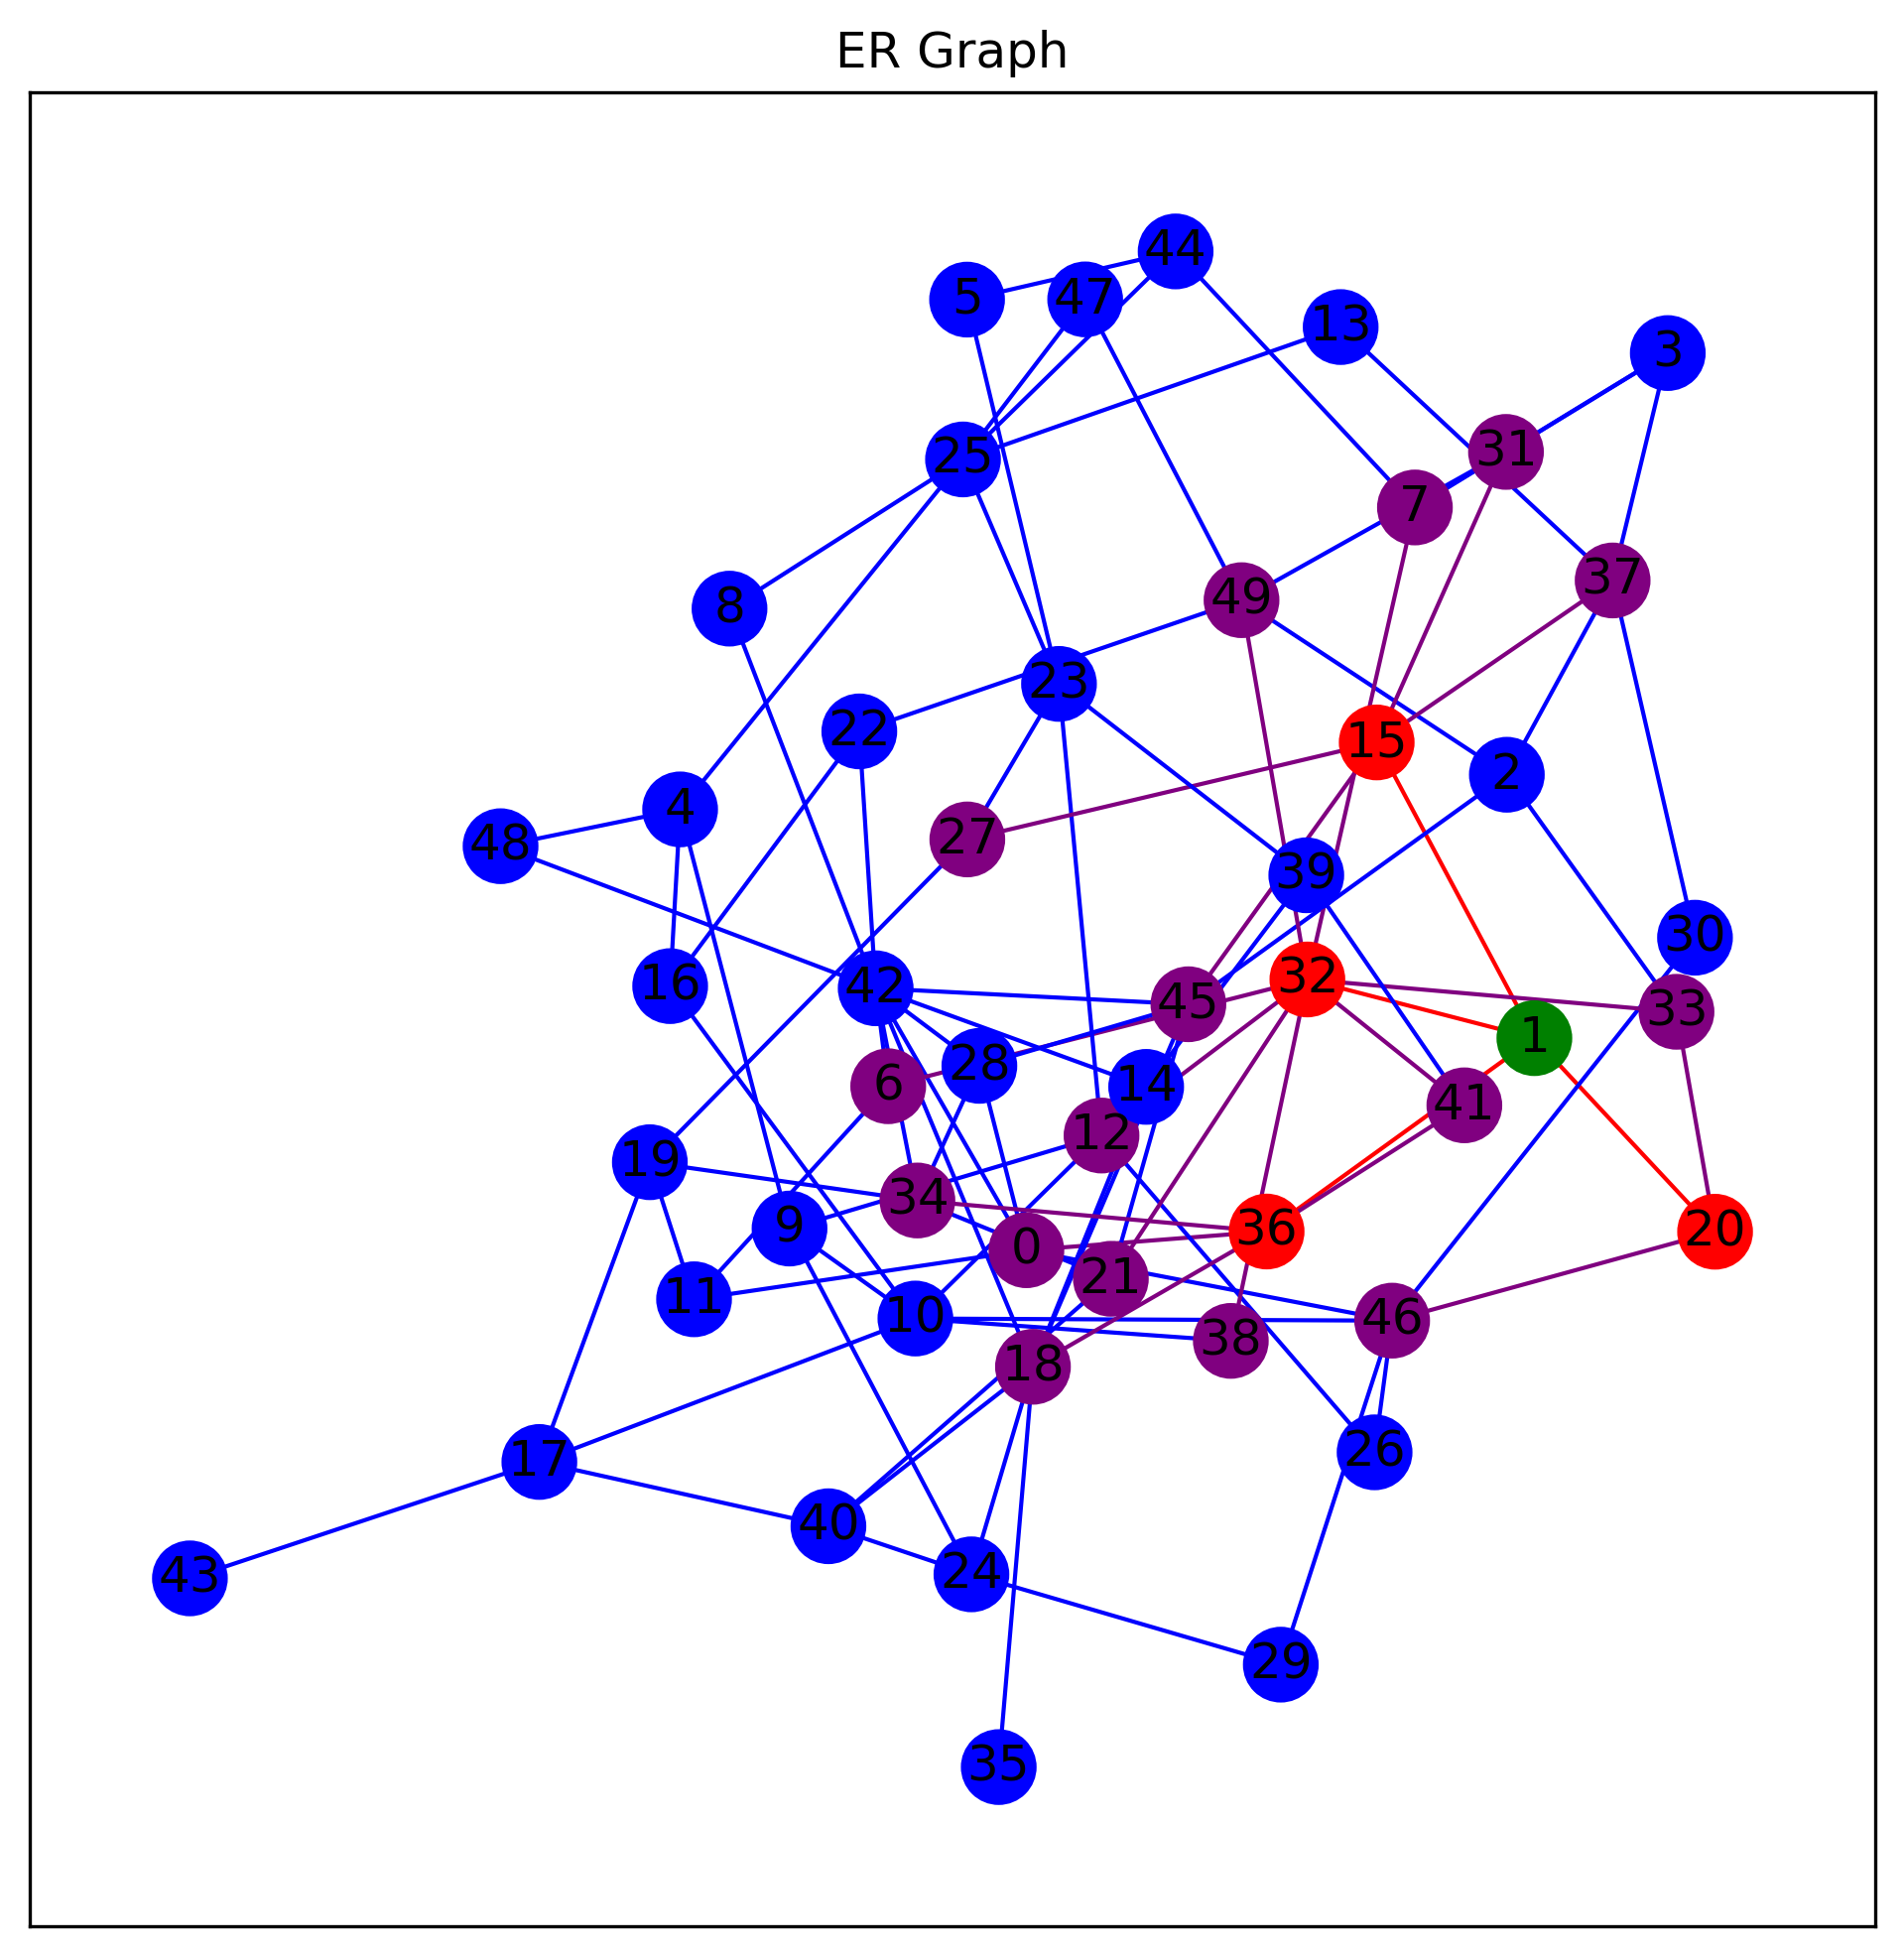

In [65]:
import networkx as nx
import matplotlib.pyplot as plt

# 生成一个ER 20节点的网络，选择一个点为绿色，最近邻为红色，次近邻为紫色，其他为蓝色
G = nx.erdos_renyi_graph(50,0.08)

for node in G.nodes:
    if node == 1:
        G.nodes[node]['color'] = 'g'
    elif node in list(G.neighbors(1)):
        G.nodes[node]['color'] = 'r'
        for neighbor in list(G.neighbors(node)):
            if neighbor != 1 and neighbor not in list(G.neighbors(1)):
                G.nodes[neighbor]['color'] = 'purple'
                print(neighbor)
    else:
        if not G.nodes[node].get('color'):
            G.nodes[node]['color'] = 'b'


for edges in G.edges:
    if 1 in edges:
        G.edges[edges]['color'] = 'r'
    # 1节点的次近邻连边为紫色
    elif edges[0] in list(G.neighbors(1)) or edges[1] in list(G.neighbors(1)):
        G.edges[edges]['color'] = 'purple'
    else:
        if not G.edges[edges].get('color'):
            G.edges[edges]['color'] = 'b'

node_colors = [G.nodes[node]['color'] for node in G.nodes]
edge_colors = [G.edges[edge]['color'] for edge in G.edges]


pos = nx.spring_layout(G)
fig = plt.figure(figsize=(8,8),dpi=300)
# 不画边
nx.draw_networkx(G,pos,with_labels=True,node_color=node_colors,edge_color=edge_colors,node_size=300)
plt.title('ER Graph')



In [29]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

# 生成一个 ER 10000节点的网络，平均度为

k_mean = np.linspace(0, 2, 20)
N = 2**12


Gcc = []
for
G = nx.erdos_renyi_graph(N, 4 / N)

[]